# Imports

In [83]:
import random
import numpy as np
import matplotlib.pyplot as plt

#Implémentation modèle linéaire en pur python

---



In [84]:
def create_linear_model(input_dim: int):
  return [random.random() * 2 - 1 for i in range(input_dim + 1)]

In [107]:
def train_regression_linear_model(model, dataset_inputs: [float], dataset_expected_outputs:[float]):
  input_size =len(model) - 1
  sample_count = len(dataset_inputs) // (input_size)
  X = np.array(dataset_inputs)
  Y = np.array(dataset_expected_outputs)

  X = np.reshape(X, (sample_count, input_size))
  bias_fake_inputs = np.ones((sample_count, 1))

  X = np.hstack((bias_fake_inputs, X))
  Y = np.reshape(Y, (sample_count, 1))

  W = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), Y)

  for i in range(len(model)):
    model[i] = W[i][0]
  



In [104]:
arr = np.ones((10,1))
arr.T

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [86]:
def train_rosenblatt_linear_model(model, dataset_inputs: [float], dataset_expected_outputs:[float], iterations_count: int = 10, alpha: float = 0.01):
  input_size =len(model) - 1
  sample_count = len(dataset_inputs) // (input_size)

  for it in range(iterations_count):
    k = random.randint(0, sample_count - 1)
    Xk = dataset_inputs[k * input_size:(k + 1) * input_size]
    yk = dataset_expected_outputs[k * 1]
    gXk = predict_linear_model_classification(model, Xk)

    model[0] += alpha * (yk - gXk) * 1.0
    for i in range(1, len(model)):
      model[i] += alpha * (yk - gXk) * Xk[i - 1]



In [87]:
# slower but readable
# def predict_linear_model_regression(model: [float], inputs: [float]):
#   inputs_with_bias = list(inputs)
#   inputs_with_bias.insert(0, 1.0)
#   sum_rslt = 0.0
#   for i in range(len(model)):
#     sum_rslt += model[i] * inputs_with_bias[i]
#   return sum_rslt

# Better but less readable
def predict_linear_model_regression(model: [float], inputs: [float]):
  sum_rslt = model[0]
  for i in range(1, len(model)):
      sum_rslt += model[i] * inputs[i - 1]
  return sum_rslt


In [71]:
def predict_linear_model_classification(model: [float], inputs: [float]):
  pred = predict_linear_model_regression(model, inputs)
  return 1.0 if pred >= 0 else -1.0

In [72]:
def destroy_linear_model():
  pass

# Utilisation du modèle linéaire pour de la classification

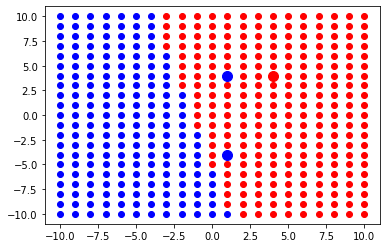

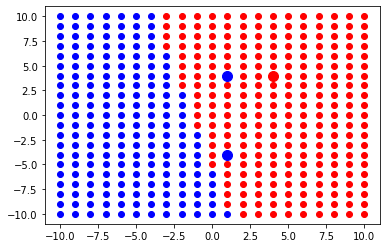

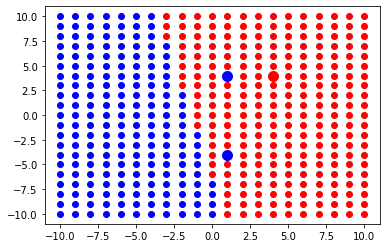

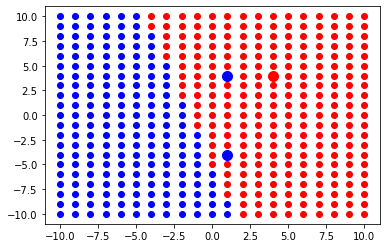

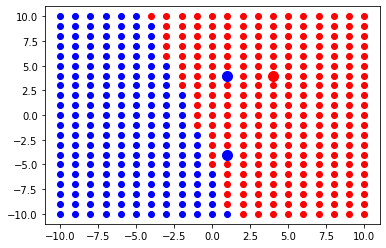

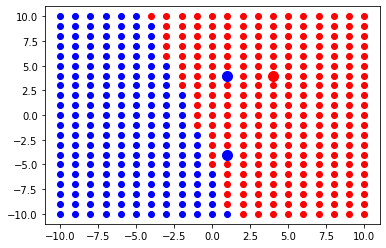

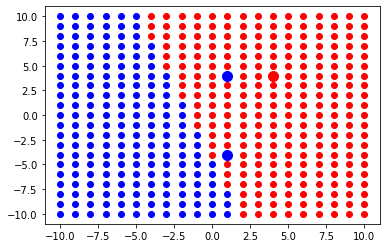

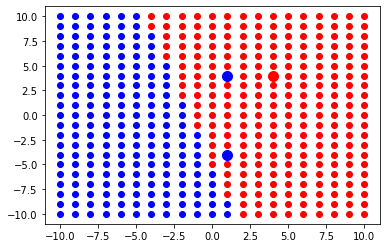

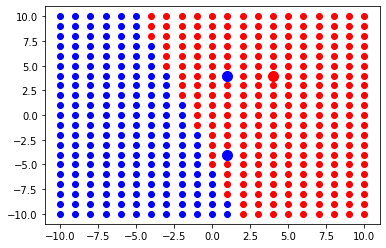

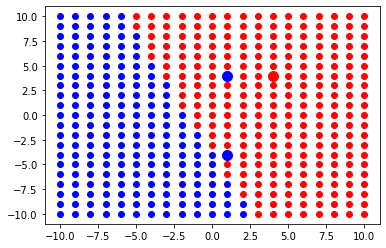

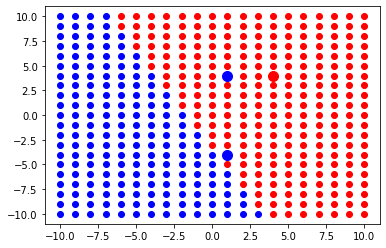

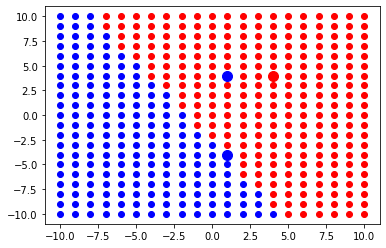

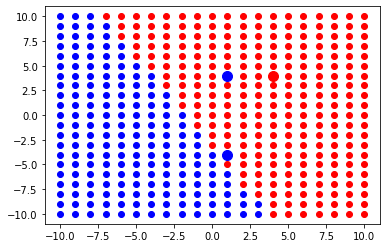

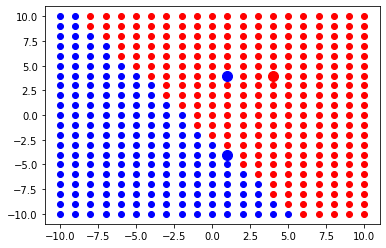

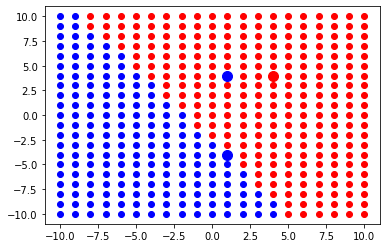

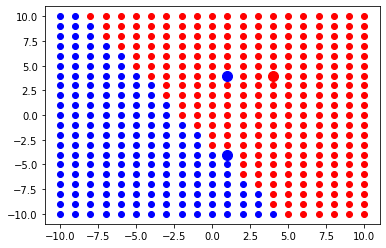

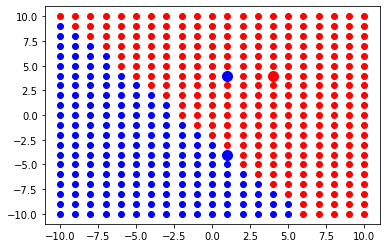

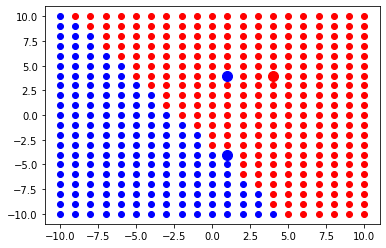

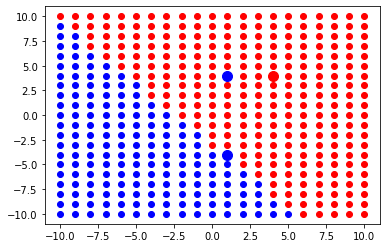

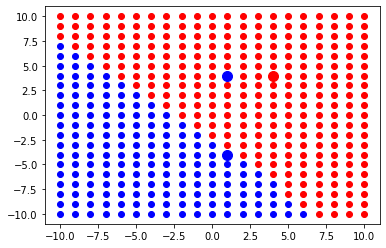

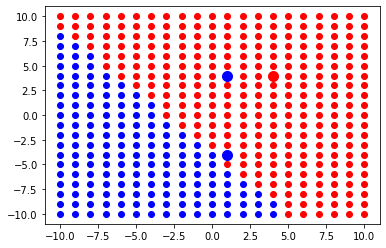

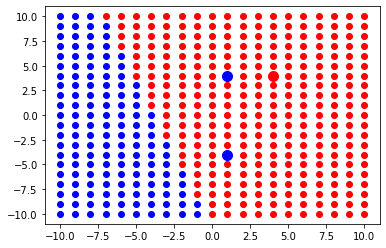

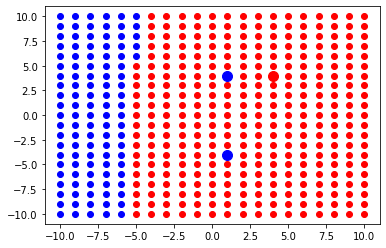

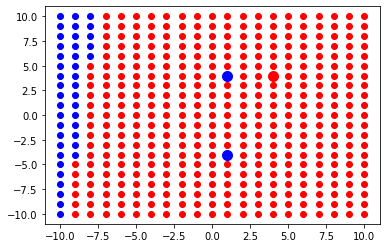

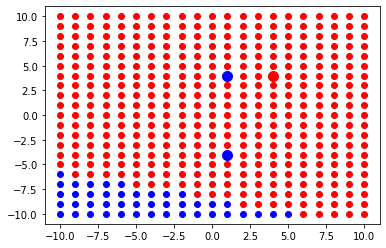

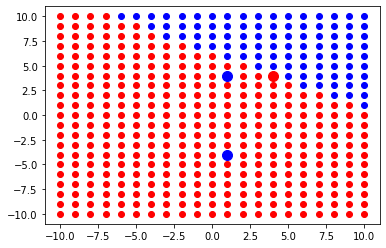

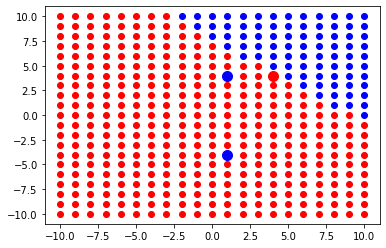

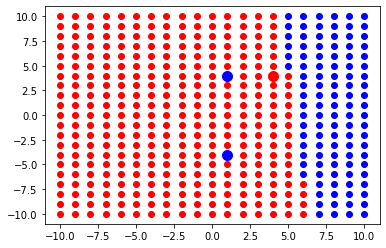

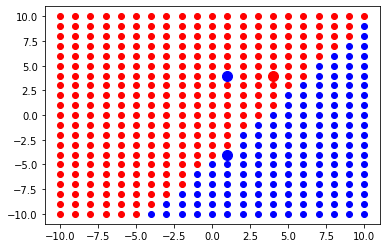

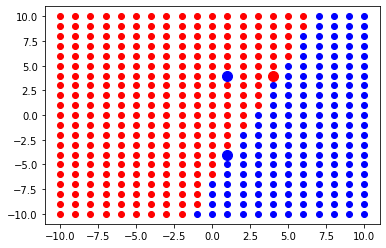

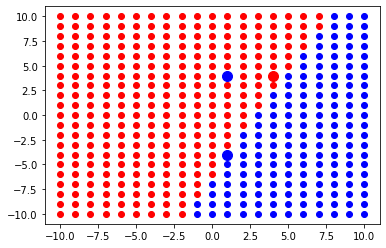

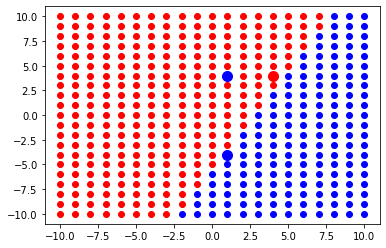

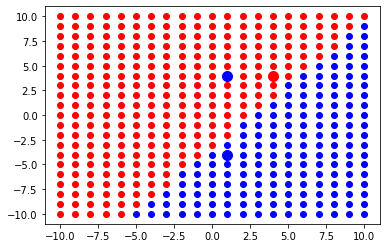

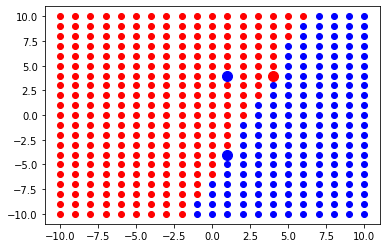

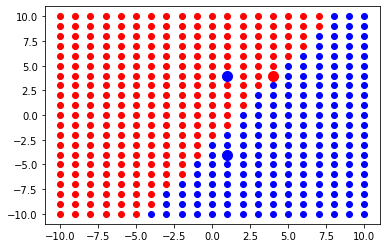

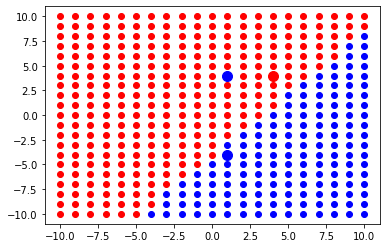

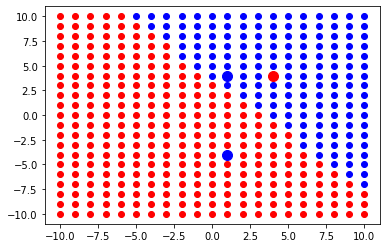

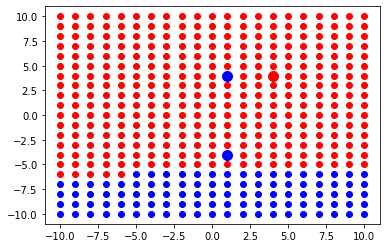

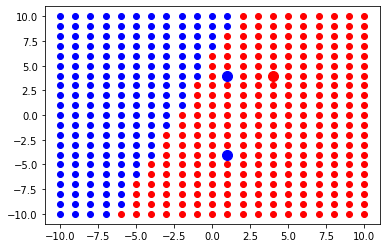

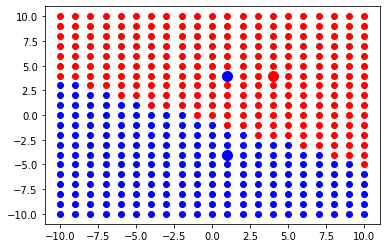

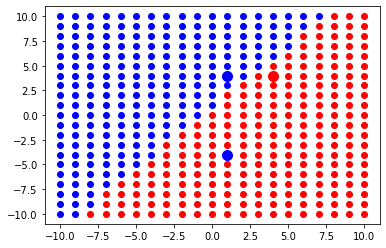

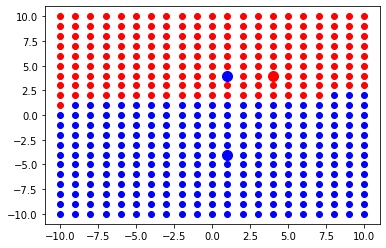

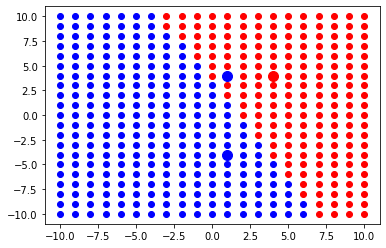

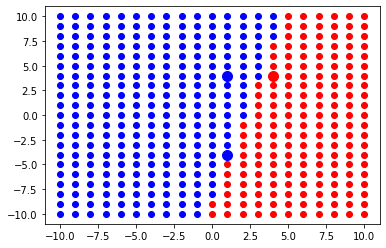

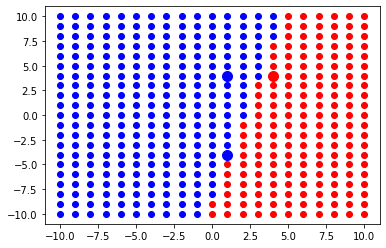

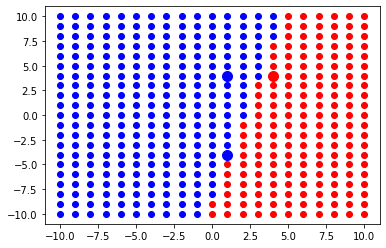

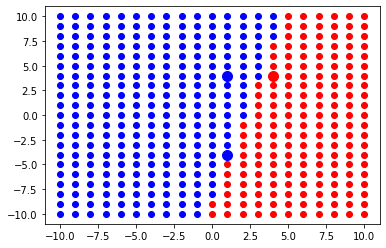

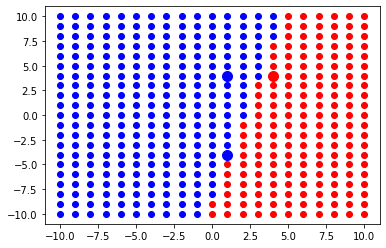

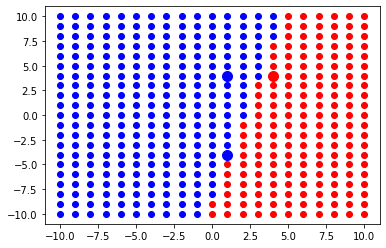

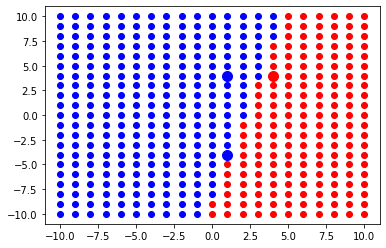

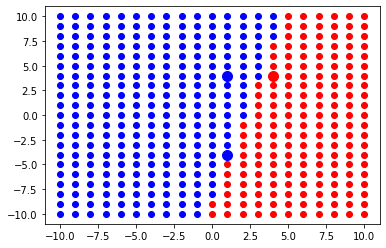

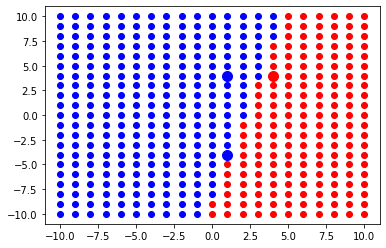

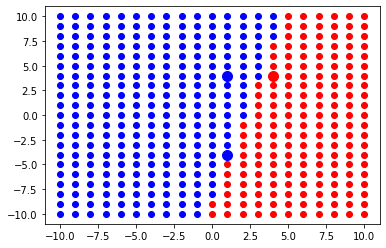

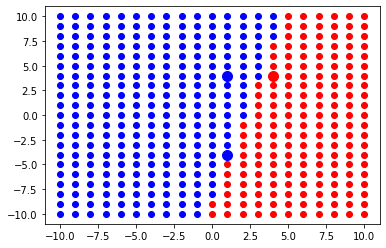

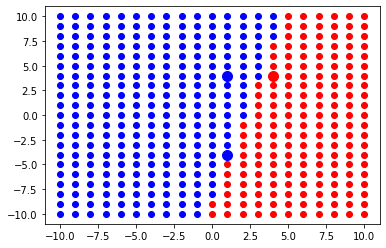

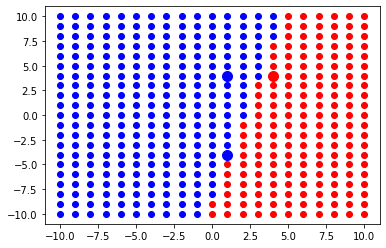

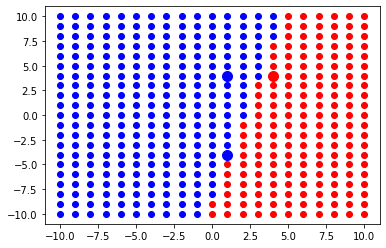

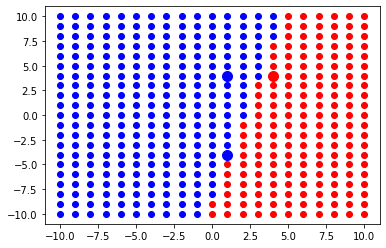

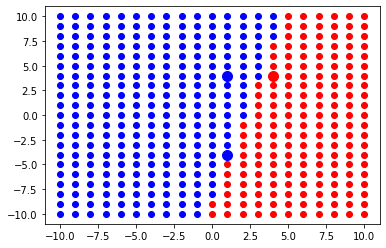

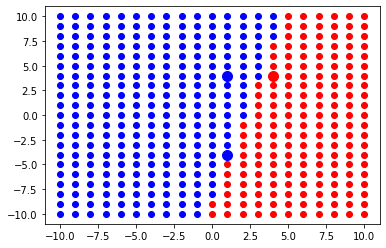

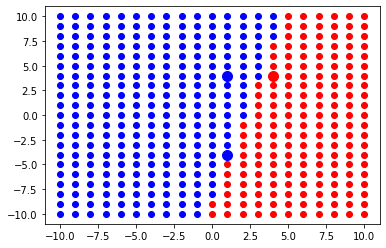

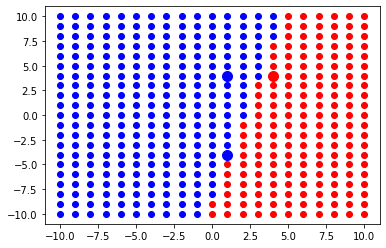

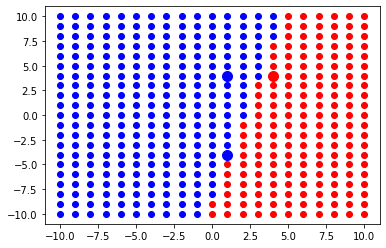

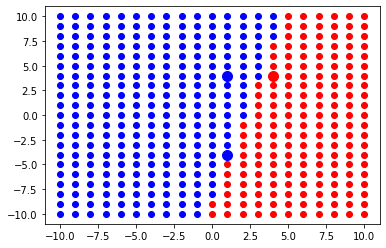

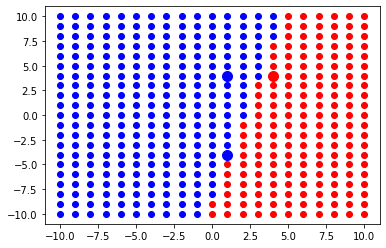

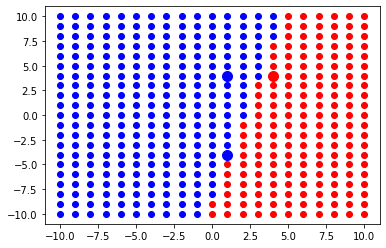

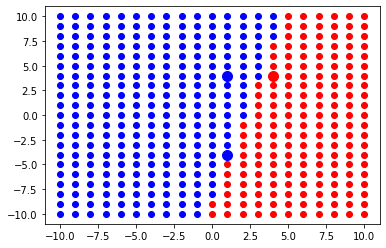

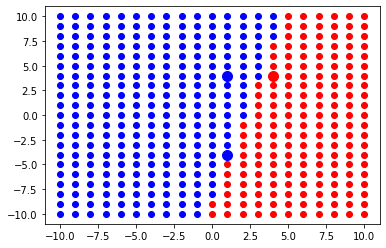

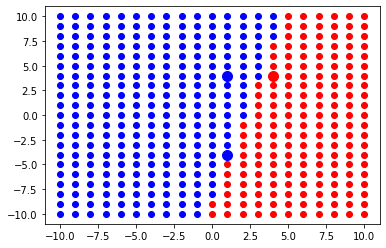

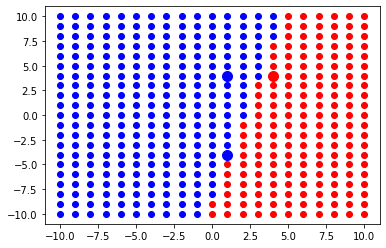

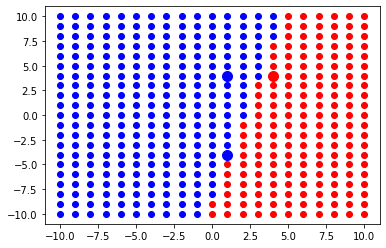

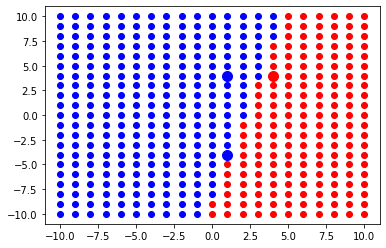

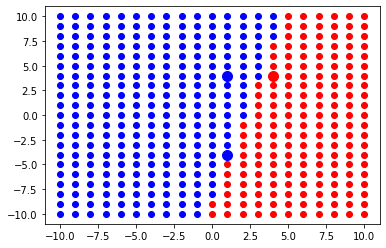

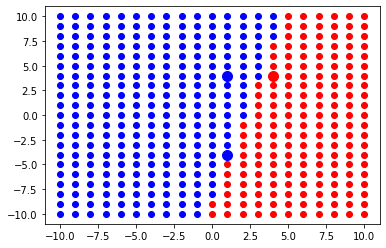

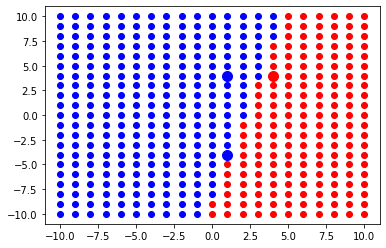

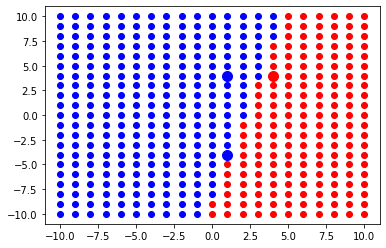

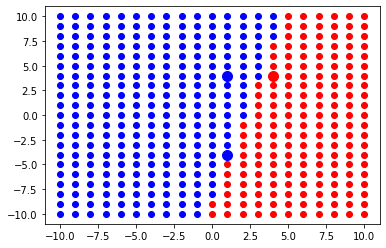

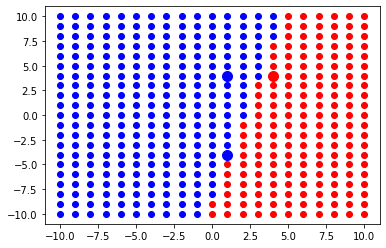

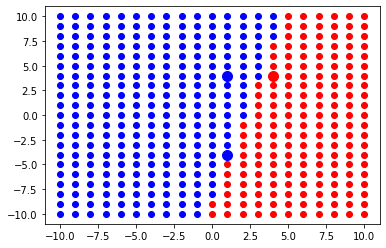

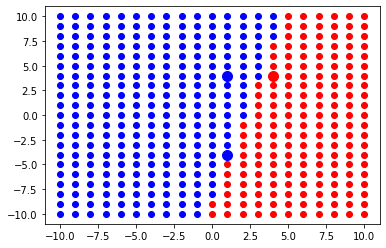

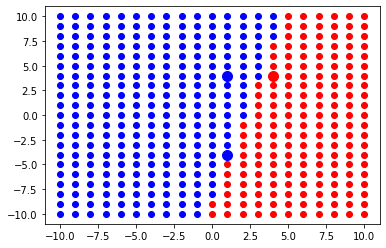

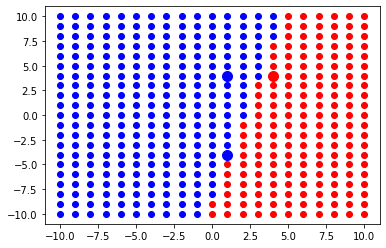

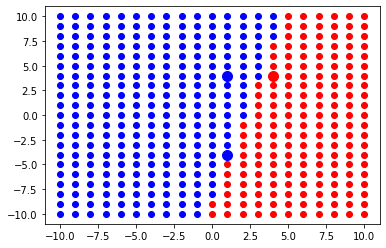

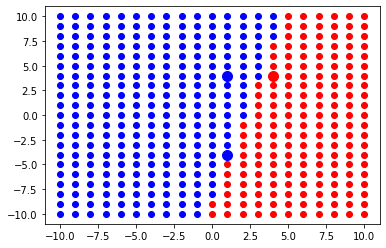

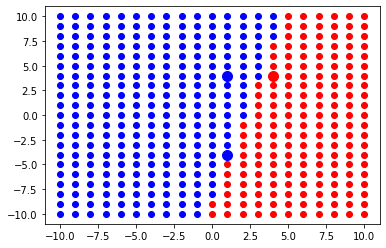

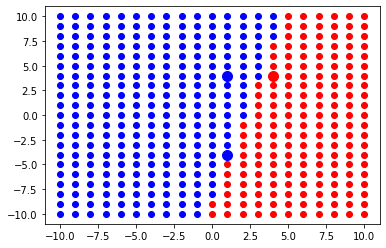

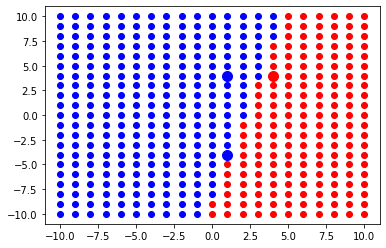

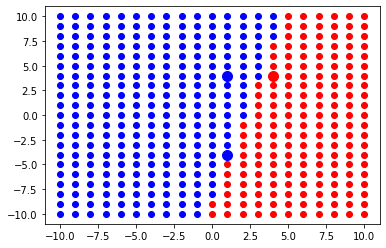

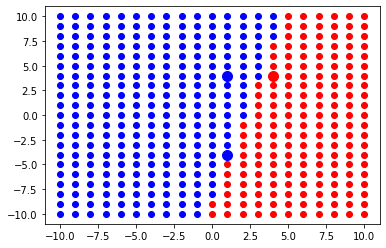

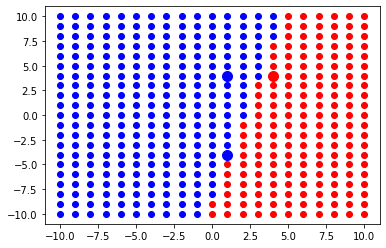

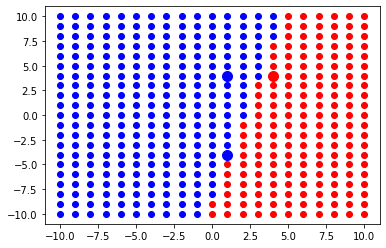

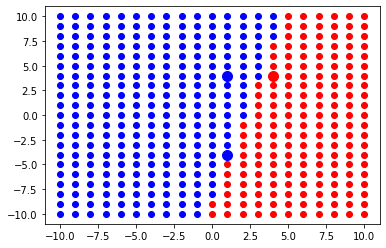

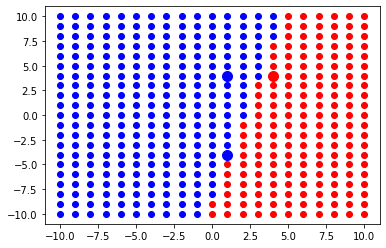

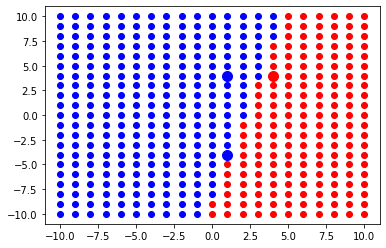

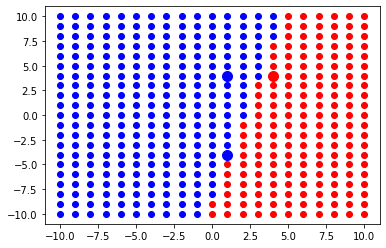

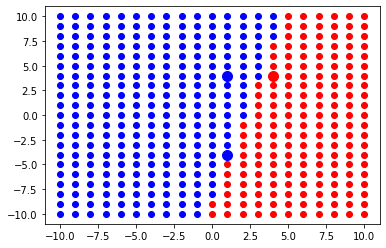

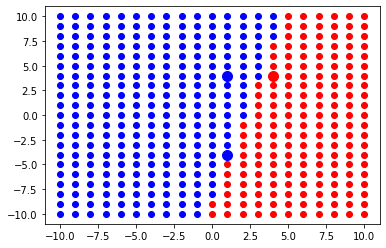

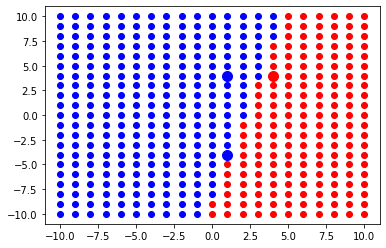

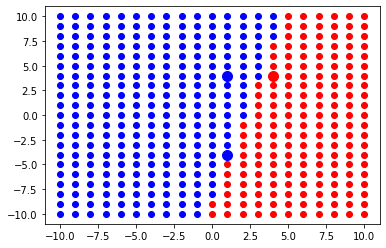

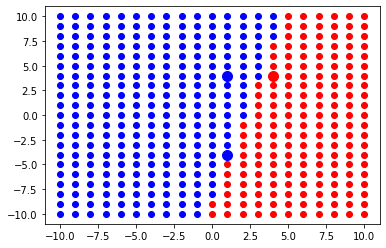

In [75]:

dataset_inputs = [
                  [1, 4],
                  [1, -4],
                  [4, 4],
]

dataset_expected_outputs = [
                  1,
                  1,
                  -1
]

model = create_linear_model(2)

for _ in range(100):
  points_x1_blue = []
  points_x2_blue = []

  points_x1_red = []
  points_x2_red = []

  for i in range(-10, 11):
    for j in range(-10, 11):
      if predict_linear_model_classification(model, [i, j]) == 1.0:
          points_x1_blue.append(i)
          points_x2_blue.append(j)
      else:
        points_x1_red.append(i)
        points_x2_red.append(j)

  plt.scatter(points_x1_blue, points_x2_blue, c='blue')
  plt.scatter(points_x1_red, points_x2_red, c='red')

  plt.scatter([p[0] for p in dataset_inputs[:2]], [p[1] for p in dataset_inputs[:2]], c='blue', s=100)
  plt.scatter([p[0] for p in dataset_inputs[2:]], [p[1] for p in dataset_inputs[2:]], c='red', s=100)

  plt.show()

  dataset_inputs_for_train = []
  for elt in dataset_inputs:
    dataset_inputs_for_train.append(elt[0])
    dataset_inputs_for_train.append(elt[1])


  train_rosenblatt_linear_model(model, dataset_inputs_for_train, dataset_expected_outputs, iterations_count=20, alpha=0.001)

# Utilisation du modèle linéaire pour de la régression

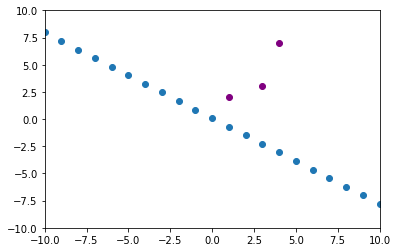

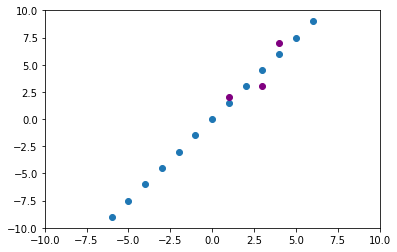

In [109]:
model = create_linear_model(1)

dataset_inputs = [
                  1,
                  3,
                  4,
]

dataset_expected_outputs = [
                  2,
                  3,
                  7
]


points_x = []
points_y = []
plt.axis([-10, 10, -10, 10])
for i in range(-10, 11):
    points_x.append(i)
    points_y.append(predict_linear_model_regression(model, [i]))

plt.scatter(points_x, points_y)
plt.scatter(dataset_inputs, dataset_expected_outputs, c="purple")
plt.show()

train_regression_linear_model(model, dataset_inputs, dataset_expected_outputs)



points_x = []
points_y = []
plt.axis([-10, 10, -10, 10])
for i in range(-10, 11):
    points_x.append(i)
    points_y.append(predict_linear_model_regression(model, [i]))

plt.scatter(points_x, points_y)
plt.scatter(dataset_inputs, dataset_expected_outputs, c="purple")
plt.show()
